In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
unit_names ={'time': 'seconds',
 'gpu': 'GBs',
 'disk': 'MBs',
 'cost': '$',
 'emission': 'grams of CO2',
 'energy': 'Wh'}

In [5]:
lite_names = ['yolov5slite', 'yolov5mlite', 'yolov5llite', 'yolov5xlite']
lite_costs_b1 = {
    'yolov5slite': {'time': 7.33982763671875, 'gpu': 0.065104384, 'disk': 7.56661, 'cost': 0.82, 'emission': 0.33049968725826645, 'energy': 1.098005605509191},
    'yolov5mlite': {'time': 10.3831806640625, 'gpu': 0.101709824, 'disk': 26.869992999999997, 'cost': 0.82, 'emission': 0.47339549226408906, 'energy': 1.5727424992162429},
    'yolov5llite': {'time': 12.7940419921875, 'gpu': 0.178425344, 'disk': 74.762129, 'cost': 0.82, 'emission': 0.6425981783569263, 'energy': 2.1348776689598883},
    'yolov5xlite': {'time': 15.4296005859375, 'gpu': 0.29081856, 'disk': 159.76284099999998, 'cost': 0.82, 'emission': 0.8162526616642753, 'energy': 2.711802862672011},
}
lite_costs_b32 = {
    'yolov5slite': {'time': 28.68366015625, 'gpu': 1.7914787840000002, 'disk': 7.56661, 'cost': 0.82, 'emission': 1.7695666199904376, 'energy': 5.878958870400125},
    'yolov5mlite': {'time': 57.310546875, 'gpu': 3.04282368, 'disk': 26.869992999999997, 'cost': 0.82, 'emission': 3.5538121864940826, 'energy': 11.80668500496373},
    'yolov5llite': {'time': 88.9806640625, 'gpu': 2.891800576, 'disk': 74.762129, 'cost': 0.82, 'emission': 5.484768286356657, 'energy': 18.221821549357667},
    'yolov5xlite': {'time': 162.485859375, 'gpu': 3.51392512, 'disk': 159.76284099999998, 'cost': 0.82, 'emission': 10.008460879883202, 'energy': 33.25070059761862},
}
lite_costs_trt1 = {
    'yolov5slite': {'time': 0.9959827880859375, 'gpu': 0.088891392, 'disk': 4.0, 'cost': 0.82, 'emission': 0.05250088401402907, 'energy': 0.1744215415748474},
    'yolov5mlite': {'time': 1.5061884765625, 'gpu': 0.009199616, 'disk': 15.0, 'cost': 343.58, 'emission': 0.07255220575024673, 'energy': 0.24103722840613537},
    'yolov5llite': {'time': 1.9401524658203124, 'gpu': 0.009199616, 'disk': 44.0, 'cost': 0.82, 'emission': 0.11297993624954904, 'energy': 0.3753486254137842},
    'yolov5xlite': {'time': 3.1086298828125, 'gpu': 0.088891392, 'disk': 94, 'cost': 708.4799999999999, 'emission': 0.1898655562665945, 'energy': 0.6307825789587858},
}
lite_costs_trt32 = {
    'yolov5slite': {'time': 8.606232421875, 'gpu': 0.296471552, 'disk': 4.0, 'cost': 0.82, 'emission': 0.42659563176072374, 'energy': 1.417261235085461},
    'yolov5mlite': {'time': 18.55625, 'gpu': 0.29892915200000003, 'disk': 15.0, 'cost': 4227.099999999999, 'emission': 1.105237208377201, 'energy': 3.6718844132132933},
    'yolov5llite': {'time': 28.9039140625, 'gpu': 0.29892915200000003, 'disk': 44.0, 'cost': 6685.46, 'emission': 1.7999448265177733, 'energy': 5.979883144577321},
    'yolov5xlite': {'time': 53.581140625, 'gpu': 0.296471552, 'disk': 94, 'cost': 12204.88, 'emission': 3.304583720563737, 'energy': 10.978683457022383},
}
lite_performances = {
    'yolov5slite': {'P': 0.456, 'mAP50': 0.483, 'mAP50-95': 0.295},
    'yolov5mlite': {'P': 0.570, 'mAP50': 0.615, 'mAP50-95': 0.426},
    'yolov5llite': {'P': 0.606, 'mAP50': 0.652, 'mAP50-95': 0.465},
    'yolov5xlite': {'P': 0.627, 'mAP50': 0.675, 'mAP50-95': 0.494},
}

In [8]:
original_names = ['yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']
original_costs_b1 = {
    'yolov5n': {'time': 8.9916591796875, 'gpu': 0.052317184, 'disk': 7.0484089999999995, 'cost': 2048.3599999999997, 'emission': 0.4031839370158231, 'energy': 1.3394815183249937},
    'yolov5s': {'time': 8.7967001953125, 'gpu': 0.1012224, 'disk': 27.088075, 'cost': 2004.08, 'emission': 0.394371690519242, 'energy': 1.3102049518911694},
    'yolov5m': {'time': 11.7536748046875, 'gpu': 0.22547814400000002, 'disk': 79.149318, 'cost': 2677.2999999999997, 'emission': 0.5393547899250696, 'energy': 1.7918763784886034},
    'yolov5l': {'time': 14.83196875, 'gpu': 0.448994304, 'disk': 173.747312, 'cost': 6798.0, 'emission': 0.7556919587373604, 'energy': 2.5106045140776097},
    'yolov5x': {'time': 17.82190234375, 'gpu': 0.796494848, 'disk': 323.175532, 'cost': 8169.15, 'emission': 0.9448155593873256, 'energy': 3.138922124210384},
}
original_costs_b32 = {
    'yolov5n': {'time': 19.69787109375, 'gpu': 1.199720448, 'disk': 7.0484089999999995, 'cost': 4487.04, 'emission': 1.1648332357325244, 'energy': 3.869877859576493},
    'yolov5s': {'time': 33.87255859375, 'gpu': 1.4320312320000002, 'disk': 27.088075, 'cost': 7716.2, 'emission': 2.0890319352509965, 'energy': 6.940305432727562},
    'yolov5m': {'time': 68.9788046875, 'gpu': 2.63469824, 'disk': 79.149318, 'cost': 31615.649999999998, 'emission': 4.251776536988496, 'energy': 14.125503445144506},
    'yolov5l': {'time': 108.8918515625, 'gpu': 2.631179776, 'disk': 173.747312, 'cost': 49909.2, 'emission': 6.689226394129913, 'energy': 22.223343502092735},
    'yolov5x': {'time': 168.052703125, 'gpu': 3.4875996160000002, 'disk': 295.876767, 'cost': 96901.04, 'emission': 10.327865613516913, 'energy': 34.31184589208277},
}
original_performances = {
    'yolov5n': {'P': 0.423, 'mAP50': 0.451, 'mAP50-95': 0.276},
    'yolov5s': {'P': 0.516, 'mAP50': 0.561, 'mAP50-95': 0.371},
    'yolov5m': {'P': 0.579, 'mAP50': 0.65, 'mAP50-95': 0.45},
    'yolov5l': {'P': 0.608, 'mAP50': 0.652, 'mAP50-95': 0.487},
    'yolov5x': {'P': 0.626, 'mAP50': 0.683, 'mAP50-95': 0.505},
}

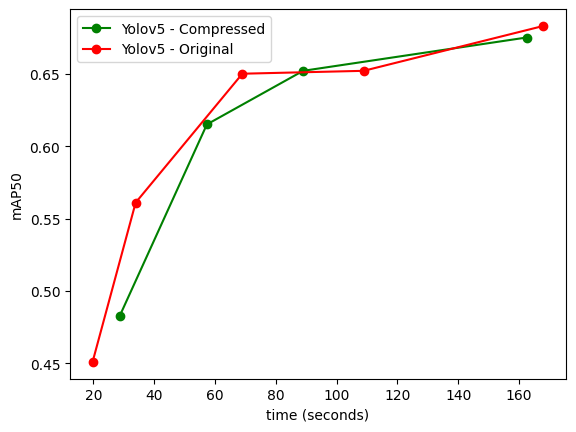

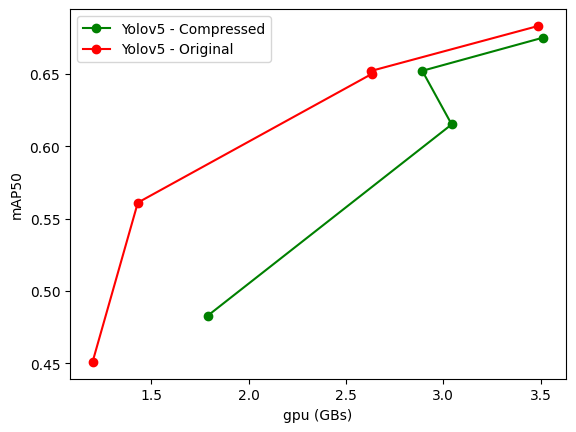

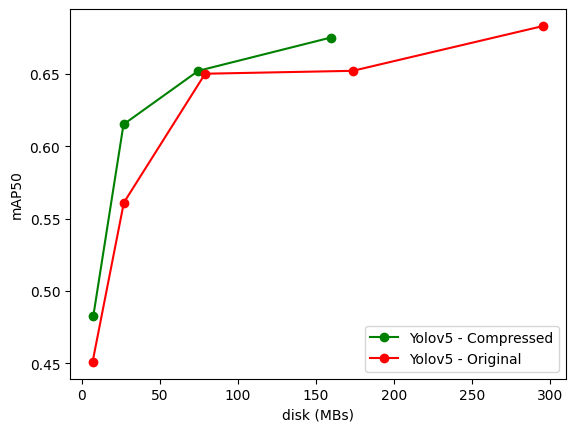

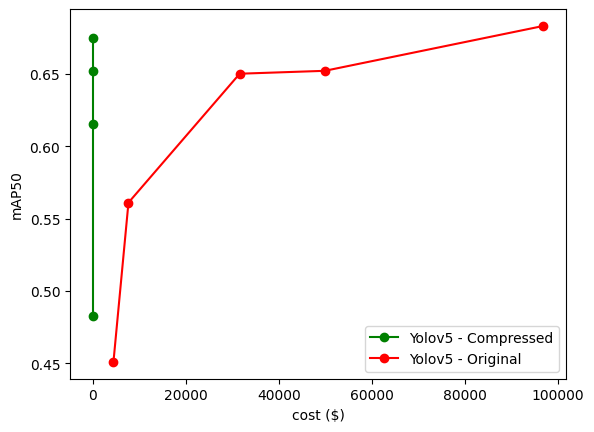

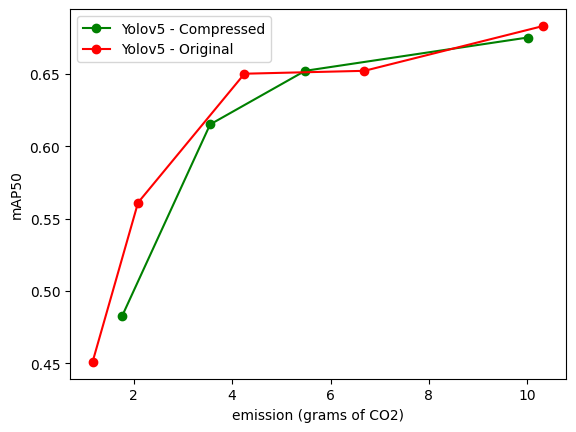

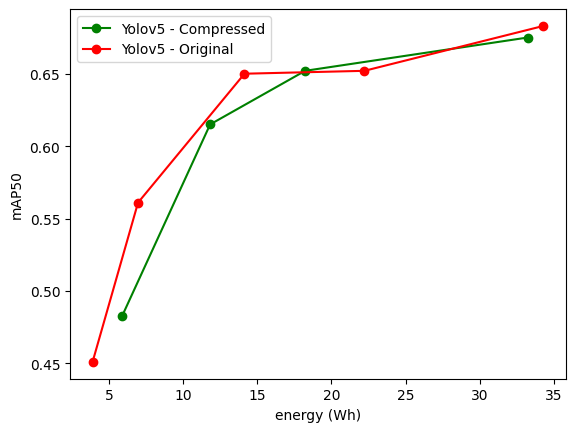

In [9]:
x_label, y_label = 'time', 'mAP50'
for x_label in ['time', 'gpu', 'disk', 'cost', 'emission', 'energy']:
    x, y = [], []
    for model_name in lite_names:
#         x.append(lite_costs_trt32[model_name][x_label])
        x.append(lite_costs_b32[model_name][x_label])
        y.append(lite_performances[model_name][y_label])
    plt.plot(x, y, label='Yolov5 - Compressed', c='g', marker='o')

    x, y = [], []
    for model_name in original_names:
        x.append(original_costs_b32[model_name][x_label])
        y.append(original_performances[model_name][y_label])
    plt.plot(x, y, label='Yolov5 - Original', c='r', marker='o')

    plt.xlabel(f'{x_label} ({unit_names[x_label]})')
    plt.ylabel(y_label)
    plt.legend()
    plt.savefig(f'Yolo-{x_label}-{y_label}.png', bbox_inches='tight')
    plt.show()